## Análisis de posición de mecanismo Manivela-balancín

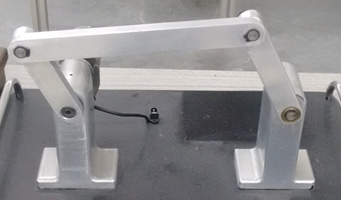

### Análisis vectorial

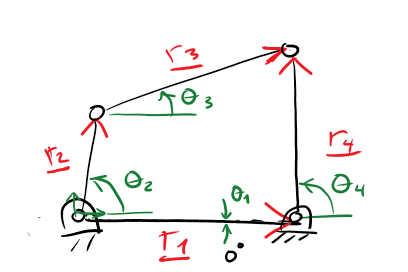

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}+\overrightarrow{r_{3}}-\overrightarrow{r_{4}}-\overrightarrow{r_{1}}=0$

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})+r3\cdot cos(\theta_{3})-r4\cdot cos(\theta_{4})-r1\cdot cos(\theta_{1})=0$,

$r2\cdot sin(\theta_{2})+r3\cdot sin(\theta_{3})-r4\cdot sin(\theta_{4})-r1\cdot sin(\theta_{1})=0$

El problema ahora consiste en resolver este sistema de ecuaciones NO LINEAL. Para esto usaremos el módulo de optimización de Scipy, específicamente la función fsolve.

### Solución

Primero importamos los módulos necesarios:
1. numpy para operaciones numéricas
2. matplotlib.pyplot para gráficas
3. fsolve de scipy.optimize para resolver el sistema de ecuaciones no lineal

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Al final necesitaremos animaciones, por lo cual importamos funcAnimation de matplotlib.animation

In [30]:
from matplotlib.animation import FuncAnimation

Luego declaramos la función

In [31]:
def manivela_balancin(x0, params):
    #variable de entrada y parámetros
    ## Primero la variable de entrada
    th2 = params[0]
    ## Luego los parámetros
    r2 = params[1]
    r3 = params[2]
    r4 = params[3]
    r1 = params[4]
    th1 = params[5]
    
    #estos son arrays de Numpy
    th3 = x0[0]
    th4 = x0[1]

    return [r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1*np.cos(th1),
            r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1*np.sin(th1)]

Luego el programa principal.

le damos valores a los parámetros y variables

In [32]:
r2 = 60
r3 = 150
r4 = 100 
r1 = 160 
th1 = 0

Declaramos las condiciones iniciales:

1. defino una posición inicial de la barra de entrada

In [33]:
th2 = np.deg2rad(69)

2. defino los parámetros del sistema, luego los incluyo en una lista. **DEBE CONSERVAR EL ORDEN QUE USE PARA INCLUIRLOS**.


en este caso, la variable de entrada está en la posición 0, luego están los parámetros, tal que 

$[\theta_2,r_2,r_3,r_4,r_1,\theta_1]$

In [34]:
params = [th2,r2,r3,r4,r1,th1]
print(params)

[1.2042771838760873, 60, 150, 100, 160, 0]


3. identifico valores aproximados de las variables secundarias (incógnitas) para la posición de la variable de entrada especificada anteriormente. 
- Esto se puede hacer por medio de método gráfico o por inspección. 
- No tienen que ser exactos, aunque entre más exacto, menor probabilidad de no-convergencia.

In [35]:
th3 = np.deg2rad(17)
th4 = np.deg2rad(87)

x0 = np.array([th3,th4])

print("para th2 = ",th2,", th3 y th4 son aproximadamente ",x0)

para th2 =  1.2042771838760873 , th3 y th4 son aproximadamente  [0.29670597 1.51843645]


Con las definiciones anteriores, debemos probar la función:

In [36]:
Y = manivela_balancin(x0, params)
print(Y)

[-0.2858052571210692, 0.007627822785238436]


si el resultado es un array con valores cercanos a cero, la implementación del análisis está bien. Como regla, si el valor entero es 0, sirve.

Ahora especificamos el número de iteraciones

In [37]:
numpos = 50

Luego definimos el vector que contiene los valores de la variable de entrada que queremos analizar

In [38]:
th2v = np.linspace(0,2*np.pi,numpos)

Y continuamos con el resto del programa.

## Solución al sistema de ecuaciones con fsolve

Con una función que represente al mecanismo verificada, podemos usar fsolve para encontrar una solucion al sistema de ecuaciones

In [39]:
#uso mínimo
q = fsolve(manivela_balancin,x0, args = params)
print(q)

[0.2967551  1.52131979]


aunque es mejor usar fsolve con más argumentos, para tener mayor información sobre el proceso

In [40]:
#uso un poco más completo
q,info,exitFlag,mensaje = fsolve(manivela_balancin,
                                x0,
                                args = params,
                                full_output = True)

print(mensaje,"la respuesta es ",q)

The solution converged. la respuesta es  [0.2967551  1.52131979]


Sabiendo como se usa la función fsolve, podemos usarla de forma iterativa, para n posiciones del mecanismo, en este caso *numpos*.

Debemos primero crear listas de numpy (arrays) donde vamos a almacenar las respuestas ($\theta_3,\theta_4$)

In [41]:
th3v = np.zeros(numpos)
th4v = np.zeros(numpos)
exitflagV = np.zeros(numpos)

Luego, iteramos usando un ciclo for y la función *enumerate*, la cual entrega:
- i: índice o posición de la lista que se está iterando, es un entero que inicia en 0 y va hasta *numpos*
- val: valor que se extrae de la lista, en este caso de th2v.

In [42]:
for i,val in enumerate(th2v):
    params[0] = val
    q,info,exitflagV[i],mensaje = fsolve(manivela_balancin,
                                        x0, 
                                        args = params,
                                        full_output = True)
    th3v[i] = q[0]
    th4v[i] = q[1]
    x0 = q
    if exitflagV[i] != 1:
        print('Error en la iteración ' + str(i))
        break
if i+1 == numpos:
    print('se ejecutaron todas las iteraciones: ' + str(numpos))
    print(np.rad2deg(th3v))
    print(np.rad2deg(th4v))
    
[th3max,posth3max] = [np.rad2deg(np.max(th3v)),np.argmax(th3v)]
[th3min,posth3min] = [np.rad2deg(np.min(th3v)),np.argmin(th3v)]

print("valor máximo de th3 = ",th3max , 
      "en la posición ", posth3max,
      " cuando th2 = ", np.rad2deg(th2v[posth3max]))
print("valor mínimo de th3 = ",th3min , 
      "en la posición ", posth3min,
      " cuando th2 = ", np.rad2deg(th2v[posth3min]))

se ejecutaron todas las iteraciones: 50
[41.40962211 37.09798365 33.10948483 29.57042515 26.52315973 23.95144303
 21.80851461 20.03776595 18.58452092 17.40132581 16.44952545 15.69908113
 15.12774084 14.72010751 14.46683588 14.36402744 14.41281179 14.61905368
 14.99308179 15.5492857  16.3053737  17.28105113 18.4959185  19.96656778
 21.70319643 23.70645307 25.96541552 28.45734157 31.149183   34.00020225
 36.9647704  39.99460979 43.04013715 46.05090257 48.97529854 51.75975682
 54.34763041 56.67793308 58.68412051 60.29317064 61.42538399 61.99560298
 61.9169473  61.10859575 59.50929422 57.09738175 53.9150301  50.08849403
 45.83013042 41.40962211]
[ 82.81924422  78.96073034  76.30110719  74.88396386  74.637675
  75.42287899  77.07616758  79.43829465  82.36757275  85.7435865
  89.46594404  93.45105929  97.62850266 101.93757516 106.32431212
 110.73893095 115.13368096 119.46106878 123.67249134 127.71739639
 131.54318907 135.09617216 138.32376701 141.17801278 143.61984846
 145.6231051  147.17686

El condicional IF de la línea 1 se incluye para que el ciclo se detenga en caso de no haber convergencia. Si todo sale bien, el vector exitflagV estará lleno de valores 1.

El condicional de la línea 13 verifica que se hayan ejecutado todas las iteraciones planteadas.

## Creación de gráficas

In [52]:
%matplotlib
plt.ion()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.legend(["Theta4"])
plt.xlabel("Theta2")
plt.ylabel("Theta4")
plt.grid()

Using matplotlib backend: Qt5Agg


## Ubicación de puntos para animación

In [44]:
pOx = 0
pOy = 0
pAx = r2*np.cos(th2v)
pAy = r2*np.sin(th2v)
pBx = pAx + r3*np.cos(th3v)
pBy = pAy + r3*np.sin(th3v)
pCx = r1*np.cos(th1)
pCy = r1*np.sin(th1)

## Preparación de animación

In [45]:
fig = plt.figure()
hr2 = plt.plot([pOx,pAx[0]],[pOy,pAy[0]])
hr3 = plt.plot([pBx[0],pAx[0]],[pBy[0],pAy[0]])
hr4 = plt.plot([pCx,pBx[0]],[pCy,pBy[0]])
plt.axis("scaled")
plt.xlim(-r2,np.amax(pBx))
plt.ylim(-r2,r4)
plt.grid()
plt.draw() 

## Animación

Definimos la función que dibuja cada cuadro (plot)

In [46]:
def animar(i):
    manivelaX = np.array([pOx,pAx[i]])
    manivelaY = np.array([pOy,pAy[i]])
    acopladorX = np.array([pBx[i],pAx[i]])
    acopladorY = np.array([pBy[i],pAy[i]])
    balancinX = np.array([pCx,pBx[i]])
    balancinY = np.array([pCy,pBy[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hr4[0].set_xdata(balancinX)
    hr4[0].set_ydata(balancinY)
    
    return hr2[0],hr3[0],hr4[0]

### Configuración y ejecución de animación

Debemos especificar:

- longitud del video en milisegundos
- número máximo de cuadros (si especificamos muchos, el video quedará muy pesado)

Luego ejecutar la animación con la función FuncAnimation()

In [47]:
videoLength = 5000 # en milisegundos
maxFrames = 80

increment = int(np.ceil(numpos/maxFrames))
totalFrames = range(0,numpos,increment)
animacion = FuncAnimation(fig, 
                          animar, 
                          frames = totalFrames,
                          interval=videoLength/len(totalFrames),
                          save_count=len(totalFrames),
                          blit=True)

### Presentación de animación

In [48]:
#En Jupyter se pueden mostrar las animaciones directamente en el cuaderno
from IPython.display import HTML

# Comentar para reducir tamaño del cuaderno, generar animación en formato gif o mp4, requiere instalar ffmpeg
#animacion.save('animation.mp4', writer='ffmpeg', fps=15)
HTML(animacion.to_jshtml())

Ahora para generar GIF visualizable en Github

In [49]:
animacion.save('animation.gif',fps=30)

y se visualiza en una celda Markdown así (no funciona en Github):
![SegmentLocal](animacion.gif "segment")

Si se necesita visualizar en una celda de código, se usa lo siguiente:

In [50]:
from IPython.display import Image
Image(url='animacion.gif')  

Si se desea generar un video para exportar la animación, descomente la siguiente línea:

In [51]:
animacion.save('mecanismo.mpg', writer="ffmpeg", fps=25, dpi=350)

Si se desea visualizar en un frame HTML5 para animaciones que queden muy pesadas en GIF (descomentar para publicación en NBViewer):